# First Look to the Data / Cleaning / EDA

## Importance of Sentiment Analysis

Sentiment analysis (also known as opinion mining or emotion AI) means text analysis with natural language processing. It is generally applied to [voice of the customer](https://en.wikipedia.org/wiki/Voice_of_the_customer) concepts such as reviews, surveys responses, social media. With sentiment analysis, positivity or negativity of text can be understood easily and quickly. As an example, politicians use this method to classify tweets about themselves for taking action. It is very important for companies also especially which sell their products online. In online stores, people do not have a chance to touch or see the products. Maybe the product is available in the market and you bought the same brand and same version of it online. But, when it is delivered you, it can be different than what you imagine still. So, customer experiences and voice of customer materials are getting more imporant for e-commerce. To increase customer satisfaction and to take strategic decisions, e-commerce companies must give more importance to reviews of customers. It is not easy to read every review and compare every product for taking action. Sentiment analysis makes it easier. With the sentiment analysis, reviews can be classified as positive and negative. It helps the company for quick and easy product analysis. 

More information about sentiment analysis can be found [here](https://en.wikipedia.org/wiki/Sentiment_analysis). There is an example from customer feedbacks below;


![title](images/example.png) 

*Image source : https://getthematic.com/insights/sentiment-analysis/*

## Sentiment Analysis of Kindle Store Reviews

In this project, I will work on sentiment analysis of Kindle Store reviews in Amazon. I choose this dataset because it is more easy to buy and read a book with Kindle. Going to the book store, finding a book which you like need more time than reaching every book from your tablet. Even people do not have to buy a Kindle to read online books from Kindle Store. When you download the Kindle App, you can reach all online books in Kindle Store from your laptop, phone or other devices.

## Aim of This Notebook

Aim of this notebook is data understanding, preparation and exploration. In this notebook, I will download data, merge another column from different dataset and try to understand the columns interactions with each others and target with the help of visualizations. I will also discover which columns need to clean. Then, I will prepare my data to modeling. 

At the end of the this notebook, all explorations and findings which are obtained from the first look of the data, can be found as a list.

## Data Source

The data is obtained from github.io page of [UC San Diego Computer Science and Engineering Department academic staff](https://nijianmo.github.io/amazon/index.html#subsets). Dataset contains product reviews and metadata, including 142.8 million reviews from May 1996 to July 2014. To download easily, some academic staff in computer science department at UCSD divided the data according to product categories. Kindle Store data is consisted of 5,722,988 reviews for 493,859 products. I prefer to use 5-core sample dataset(such that each of the remaining users and items have at least 5 reviews) and metadata for Kindle Store. The reasons to choose 5-core data is that continuous users contains more information than single reviewers. To reach and download metadata, people have to fill the form and submit it. 

The code of the getting data can be found [Getting_Data_from_json_Files notebook](https://github.com/ezgigm/sentiment_analysis_and_product_recommendation/blob/master/notebooks/Getting_Data_from_json_Files%20.ipynb).

My main data contains 2,222,983 rows and 12 columns. Also, I used the metadata to find the corresponding names of the books from product ID. 

# Importing Necessary Libraries

In [47]:
# dataframe and series 
import pandas as pd
import numpy as np

# sklearn imports for modeling part
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.corpus import stopwords


In [48]:
pd.options.display.max_columns=100 # To see the hidden columns in dataframe

# Importing Data from .csv

In [3]:
df = pd.read_csv('C:\\Users\\swammy\\Downloads\\sample30.csv') #getting main data
df

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive


df_meta = pd.read_csv('kindle_meta_last.csv', low_memory=False) #getting metadata for title names

In [4]:
df.head() #first look to df

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


# merging the metadata title column to main dataset
df = pd.merge(df,df_meta[['title','asin']],on=['asin'], how='left') 

In [5]:
df.shape #to see the number of columns and rows

(30000, 15)

In [6]:
df.isna().sum() #to see null values

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

Most important columns for my project are overall and reviewText. So I have to drop the nulls for these two columns.

In [7]:
df.dropna(subset=['reviews_title'], inplace=True) #droping null's in reviews
df.dropna(subset=['user_sentiment'], inplace=True) #droping null's in reviews

In [8]:
df.isna().sum() # to check

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     13877
reviews_doRecommend      2404
reviews_rating              0
reviews_text                0
reviews_title               0
reviews_userCity        27881
reviews_userProvince    29642
reviews_username           62
user_sentiment              0
dtype: int64

# Deeper Look to Columns

To decide cleaning and preparing process, I will look deeper to columns.

In [9]:
df.info(verbose=True, null_counts=True) #to see the type of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29809 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29809 non-null  object
 1   brand                 29809 non-null  object
 2   categories            29809 non-null  object
 3   manufacturer          29668 non-null  object
 4   name                  29809 non-null  object
 5   reviews_date          29763 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27405 non-null  object
 8   reviews_rating        29809 non-null  int64 
 9   reviews_text          29809 non-null  object
 10  reviews_title         29809 non-null  object
 11  reviews_userCity      1928 non-null   object
 12  reviews_userProvince  167 non-null    object
 13  reviews_username      29747 non-null  object
 14  user_sentiment        29809 non-null  object
dtypes: int64(1), object(14)
memory usage

In [10]:
df['reviews_rating'].value_counts() 

5    20691
4     6002
1     1372
3     1333
2      411
Name: reviews_rating, dtype: int64

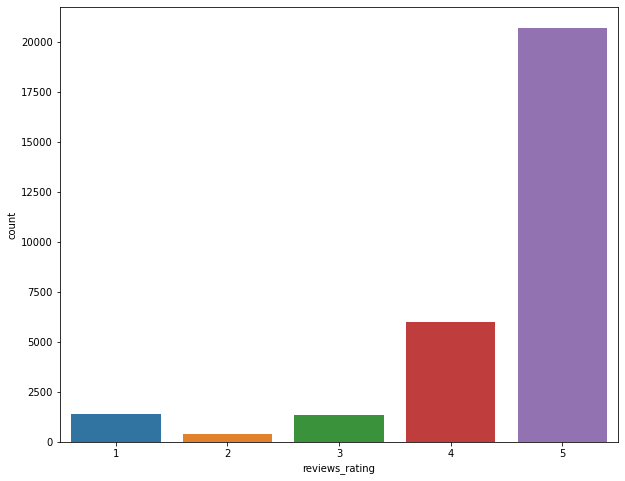

In [11]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='reviews_rating', data=df)

Mostly ratings in dataset consist of good reviews such as 4 and 5. It is seen that our target is imbalanced.

df['verified'].value_counts()

plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', data=df)

Nearly, 64% of reviews are verified by Amazon in our data. The verification of reviews needs time also, the fake review detection is not the topic of this project so, I assume that non-verified reviews have not been verified yet by Amazon. But, by the time they will be verified, so, I will not change anything in this column.

plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', hue="overall", data=df)

The distribution of ratings are nearly same in verified and non-verified reviews.

In [12]:
df['reviews_date'].nunique()

6711

Review time is daily-based in our data. So, it means that data is collected from 4828 different days.

### Converting Data from String to Datetime to Divide Day, Month and Years

# Looking to Days

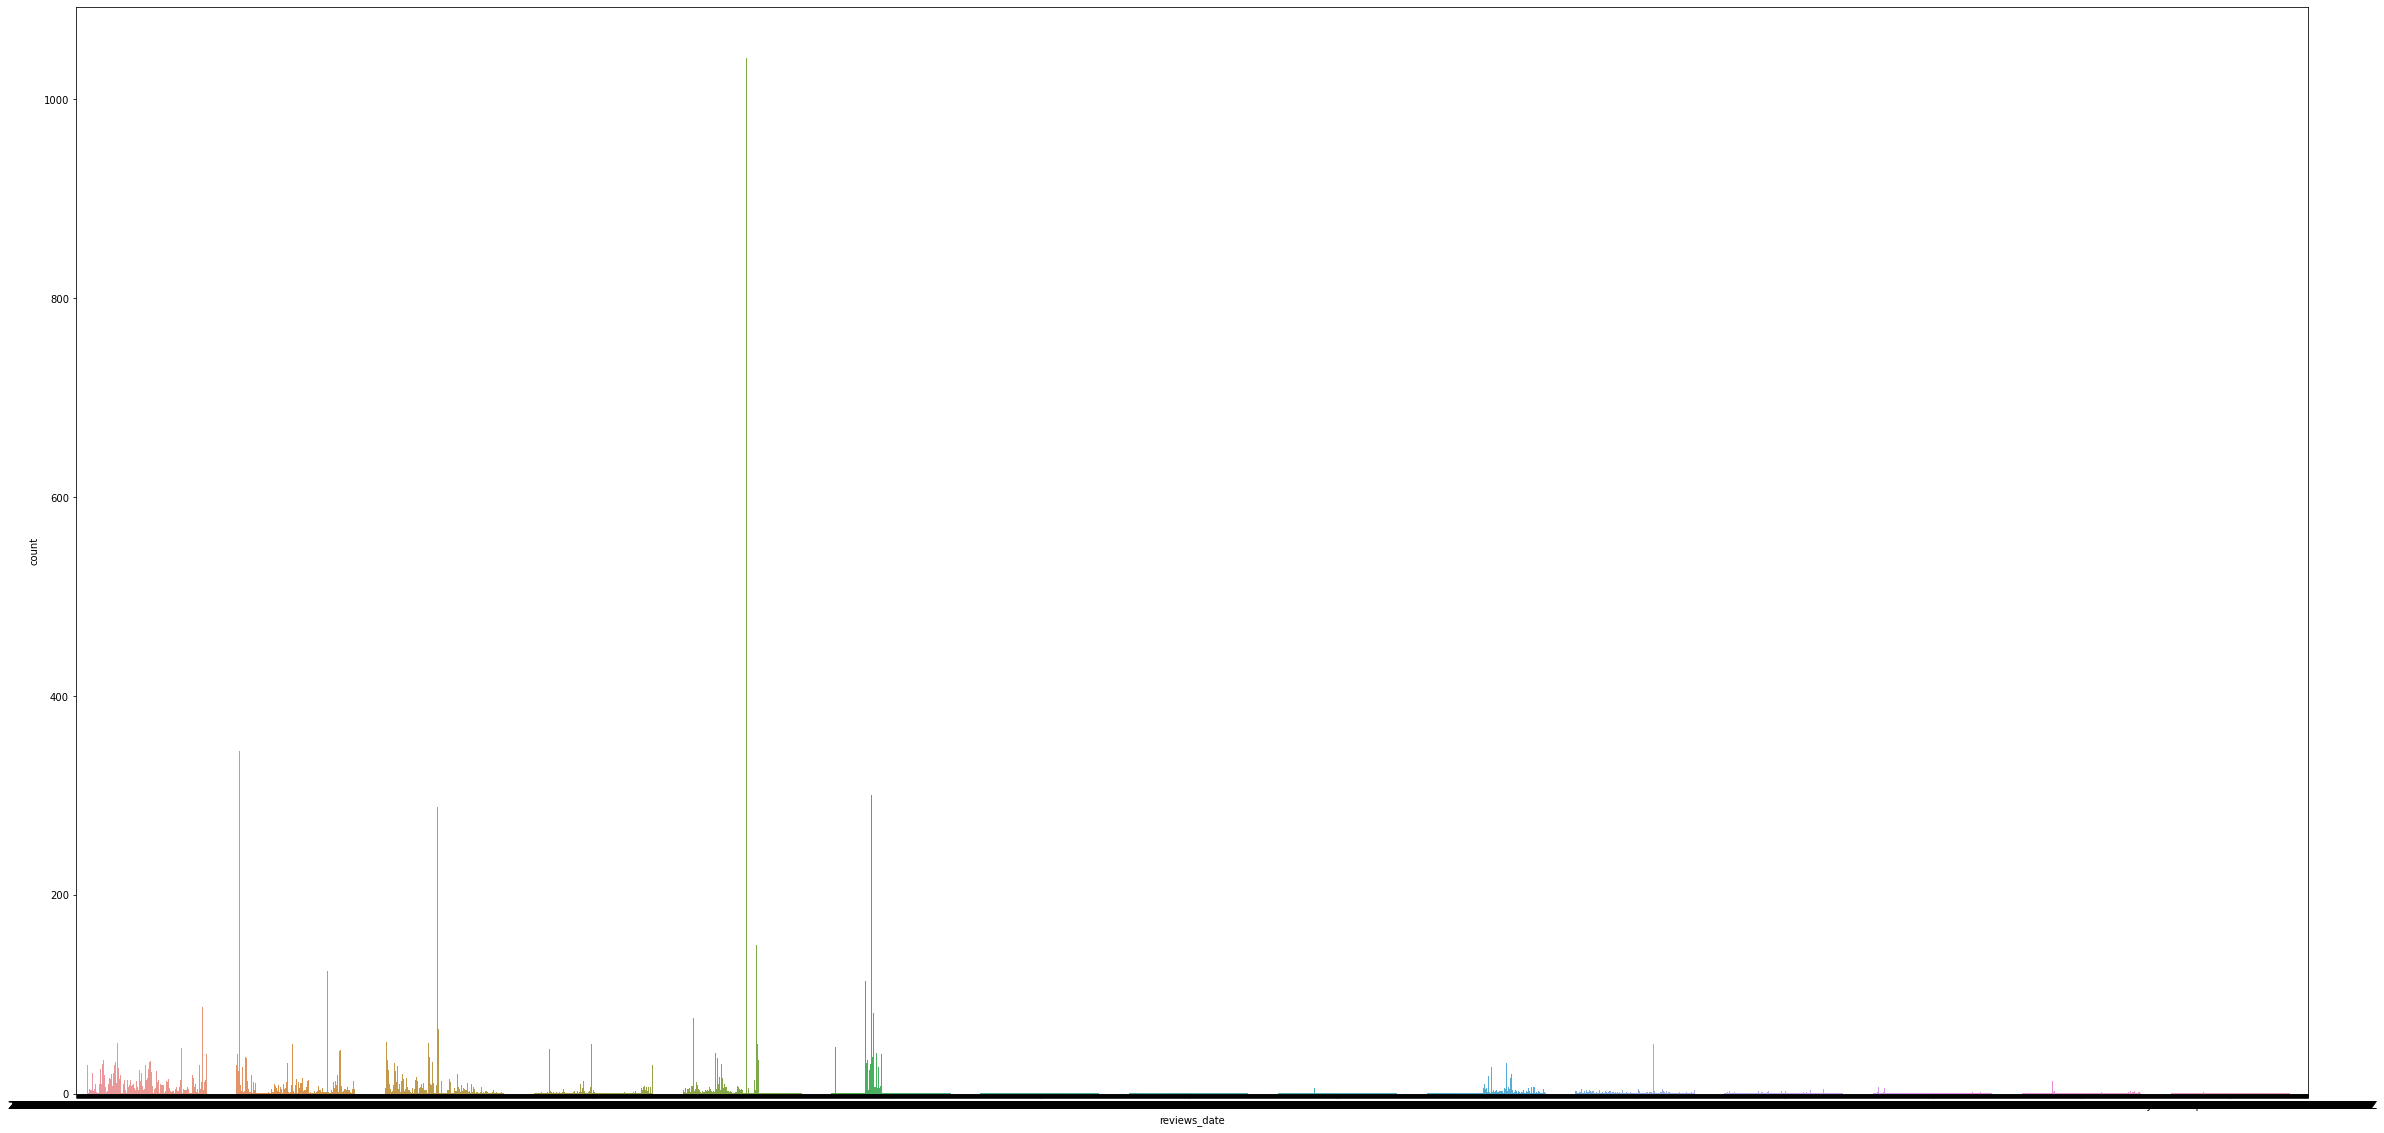

In [13]:
plt.figure(figsize=(40,20))
ax = sns.countplot(x='reviews_date',data=df)

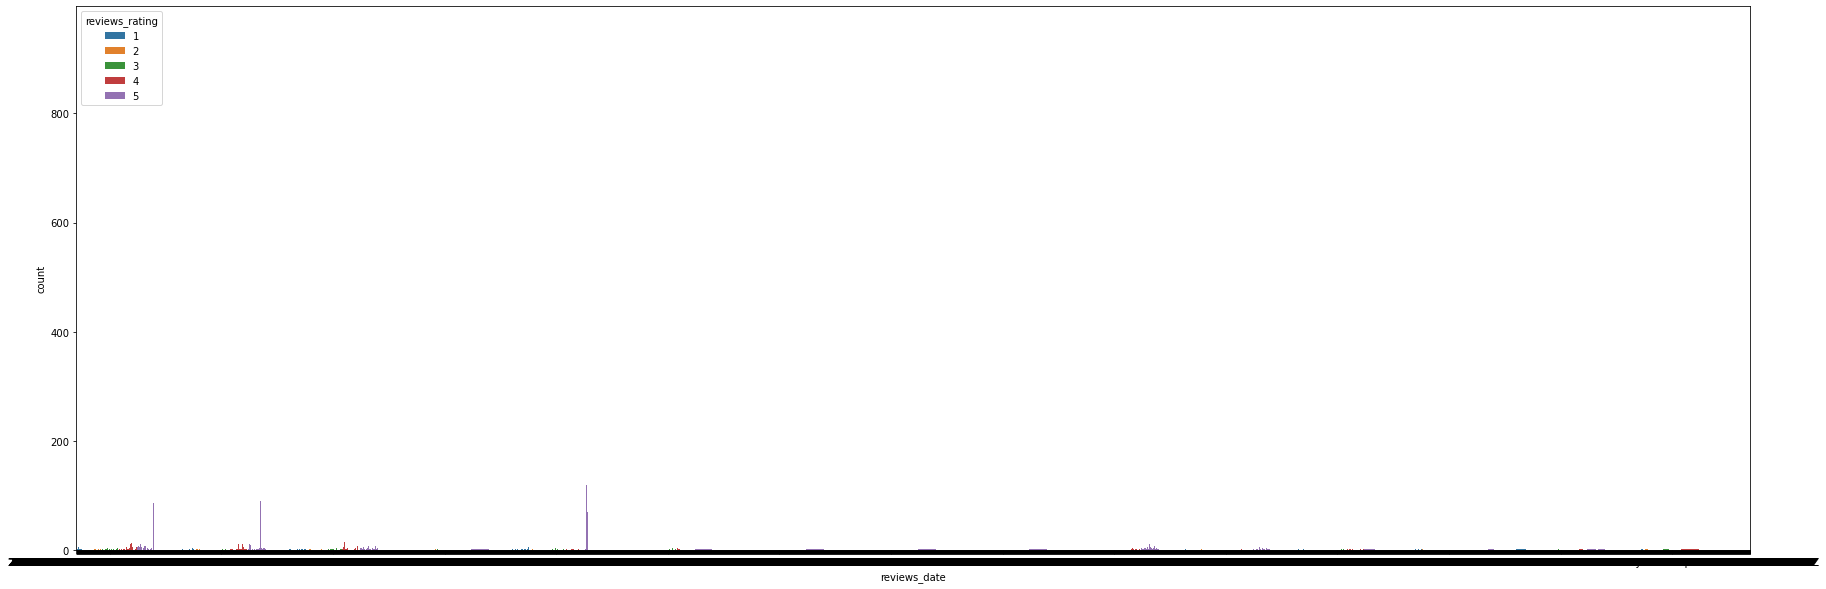

In [14]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='reviews_date', hue="reviews_rating", data=df)

According to plots above, our data distribution is nearly same for each day, except 31st. Because, every month do not have 31th day. This is also a good indicator for reliability for our data.

### Looking to Reviewers

df['reviewerID'].nunique()

In [15]:
df['id'].nunique()

252

There are 139815 different ID for reviews in this data.

In [16]:
df['reviews_username'].nunique()

24787

Normally, reviewer ID must be same reviewer name but name is less than ID. It means that some people use same names with each other. So, reviewer ID column contains more information than name column. So, I will drop this column. 

df.drop(columns=['reviewerName'],inplace=True) #droping reviewername column

In [17]:
df.drop(columns=['reviews_username'],inplace=True) #droping reviewername column

### Looking to Reviewers According to Ratings and Rated Books

Top 100 head rating averages are 5. But, it does not give good idea to us. Because maybe they just rated 5 books as 5. But, there are many user which rated more than 500 books.

In [18]:
df.groupby('id')['brand'].count().sort_values(ascending=False).head(100)

id
AVpf3VOfilAPnD_xjpun    8544
AVpfPaoqLJeJML435Xk9    3324
AVpfJP1C1cnluZ0-e3Xy    2039
AVpfW8y_LJeJML437ySW    1186
AVpfRTh1ilAPnD_xYic2    1139
                        ... 
AVpe6CHv1cnluZ0-ZhwN      15
AVpf9_3MLJeJML43GvdB      15
AVpe7GIELJeJML43yZfu      15
AV1h6Gu0glJLPUi8IjA_      14
AV1YqAaMGV-KLJ3adiDj      14
Name: brand, Length: 100, dtype: int64

Each user, who is in the top 100 according to rate count, have more than 400 reviews. 'asin' shows the book ID's. So, we can count books according to 'asin' column.

### Looking to Top 3 User According to Review Number

In [19]:
df.loc[df['id']=='AVpf3VOfilAPnD_xjpun'].groupby('reviews_rating')['brand'].count()

reviews_rating
1      16
2      11
3      71
4    1295
5    7151
Name: brand, dtype: int64

In [20]:
df.loc[df['id']=='AVpfPaoqLJeJML435Xk9'].groupby('reviews_rating')['brand'].count()

reviews_rating
1      37
2      57
3     348
4    1143
5    1739
Name: brand, dtype: int64

In [21]:
df.loc[df['id']=='AVpfJP1C1cnluZ0-e3Xy'].groupby('reviews_rating')['brand'].count()

reviews_rating
1      13
2       1
3      16
4     239
5    1770
Name: brand, dtype: int64

In [22]:
df['brand'].nunique() #showing number of books in data

199

We will look at the books according to number of reviews. Because only rating does not give reliably results such as 5 average rating book with 5 reviews vs. 4.8 average rating book with 1000 reviews.

# 8 Reviews with 5.0 Average Rating vs 2217 Reviews with 4.3 Average Rating 

In [23]:
df.groupby('brand')['reviews_rating'].mean().sort_values(ascending=False).head(10)

brand
4C Foods                5.0
Tim Holtz               5.0
Dermalogica             5.0
Pinaud                  5.0
Fiskars                 5.0
Happy Family            5.0
Stonyfield              5.0
Heinz                   5.0
Hortense B. Hewitt      5.0
Southern Enterprises    5.0
Name: reviews_rating, dtype: float64

In [24]:
df['brand'].value_counts().head(10)

Clorox                  10584
Warner Home Video        3324
Disney                   1196
L'oreal Paris            1186
FOX                       887
Burt's Bees               881
Sony Pictures             845
Summit Entertainment      813
Nexxus                    691
Universal Home Video      668
Name: brand, dtype: int64

In [25]:
df.loc[df['brand']=='4C Foods'].groupby('reviews_rating').count() # according to review avg.

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,user_sentiment
reviews_rating,,,,,,,,,,,,,
5,6,6,6,6,6,6,6,6,6,6,0,0,6


Only 6 reviews but all is 5.0.

In [26]:
df.loc[df['brand']=='Clorox'].groupby('reviews_rating').count() # according to review number

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,user_sentiment
reviews_rating,,,,,,,,,,,,,
1,29,29,29,29,29,29,20,20,29,29,4,1,29
2,12,12,12,12,12,12,9,11,12,12,0,0,12
3,87,87,87,87,87,87,68,86,87,87,5,0,87
4,1534,1534,1534,1534,1534,1534,1183,1532,1534,1534,140,2,1534
5,8922,8922,8922,8922,8922,8922,7009,8874,8922,8922,870,15,8922


Total 10584 reviews but 3.6% rated as 1 and 2.

When we compare our two results, sorting movies according to review numbers is shown more reliable than looking to the average of ratings. So, we will analyze and compare mostly reviewed movies.  

## Top 10 Highly Reviewed Movies

In [27]:
df.loc[df['brand']=='Universal Home Video'].groupby('name').mean() # run this for 10 different asin values

,reviews_rating
name,
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),4.491018


In [28]:
df_movies = pd.DataFrame(columns=["movieName", "Rating #",'Rating Avg.']) # result df for showing books together
df_movies

,movieName,Rating #,Rating Avg.


In [29]:
# writing findings to df
df_movies = df_movies.append({     
     "movieName": 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total ' ,
      "Rating #": 10584 , 
       'Rating Avg.' : 4.82}, ignore_index=True)
df_movies = df_movies.append({     
     "movieName": 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd' ,
      "Rating #": 3324 , 
       'Rating Avg.' : 4.35}, ignore_index=True)
df_movies = df_movies.append({     
     "movieName": 'Doc Mcstuffins: Friendship Is The Best Medicine' ,
      "Rating #": 1196 , 
       'Rating Avg.' : 4.91}, ignore_index=True)
df_movies = df_movies.append({     
     "movieName": 'L\'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz' ,
      "Rating #": 1186 , 
       'Rating Avg.' : 4.02}, ignore_index=True)
df_movies = df_movies.append({     
     "movieName": 'There\'s Something About Mary (dvd)' ,
      "Rating #": 887 , 
       'Rating Avg.' : 4.52}, ignore_index=True)

In [30]:
df_movies = df_movies.append({     
     "movieName": 'Burt\'s Bees Lip Shimmer, Raisin' ,
      "Rating #": 881 , 
       'Rating Avg.' : 4.65}, ignore_index=True)
df_movies = df_movies.append({     
     "movieName": 'The Resident Evil Collection 5 Discs (blu-Ray)' ,
      "Rating #": 845 , 
       'Rating Avg.' : 4.67}, ignore_index=True)
df_movies = df_movies.append({     
     "movieName": "Red (special Edition) (dvdvideo)" ,
      "Rating #": 813 , 
       'Rating Avg.' : 4.65}, ignore_index=True)
df_movies = df_movies.append({     
     "movieName": "Nexxus Exxtra Gel Style Creation Sculptor" ,
      "Rating #": 691 , 
       'Rating Avg.' : 1.34}, ignore_index=True)
df_movies = df_movies.append({     
     "movieName": "My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)" ,
      "Rating #": 668 , 
       'Rating Avg.' : 4.49}, ignore_index=True)

In [31]:
df_movies

,movieName,Rating #,Rating Avg.
0,Clorox Disinfecting Wipes Value Pack Scented 1...,10584,4.82
1,Godzilla 3d Includes Digital Copy Ultraviolet ...,3324,4.35
2,Doc Mcstuffins: Friendship Is The Best Medicine,1196,4.91
3,L'or233al Paris Elvive Extraordinary Clay Reba...,1186,4.02
4,There's Something About Mary (dvd),887,4.52
5,"Burt's Bees Lip Shimmer, Raisin",881,4.65
6,The Resident Evil Collection 5 Discs (blu-Ray),845,4.67
7,Red (special Edition) (dvdvideo),813,4.65
8,Nexxus Exxtra Gel Style Creation Sculptor,691,1.34
9,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,668,4.49


[Text(0, 0, 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total '),
 Text(0, 0, 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd'),
 Text(0, 0, 'Doc Mcstuffins: Friendship Is The Best Medicine'),
 Text(0, 0, "L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz"),
 Text(0, 0, "There's Something About Mary (dvd)"),
 Text(0, 0, "Burt's Bees Lip Shimmer, Raisin"),
 Text(0, 0, 'The Resident Evil Collection 5 Discs (blu-Ray)'),
 Text(0, 0, 'Red (special Edition) (dvdvideo)'),
 Text(0, 0, 'Nexxus Exxtra Gel Style Creation Sculptor'),
 Text(0, 0, 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)')]

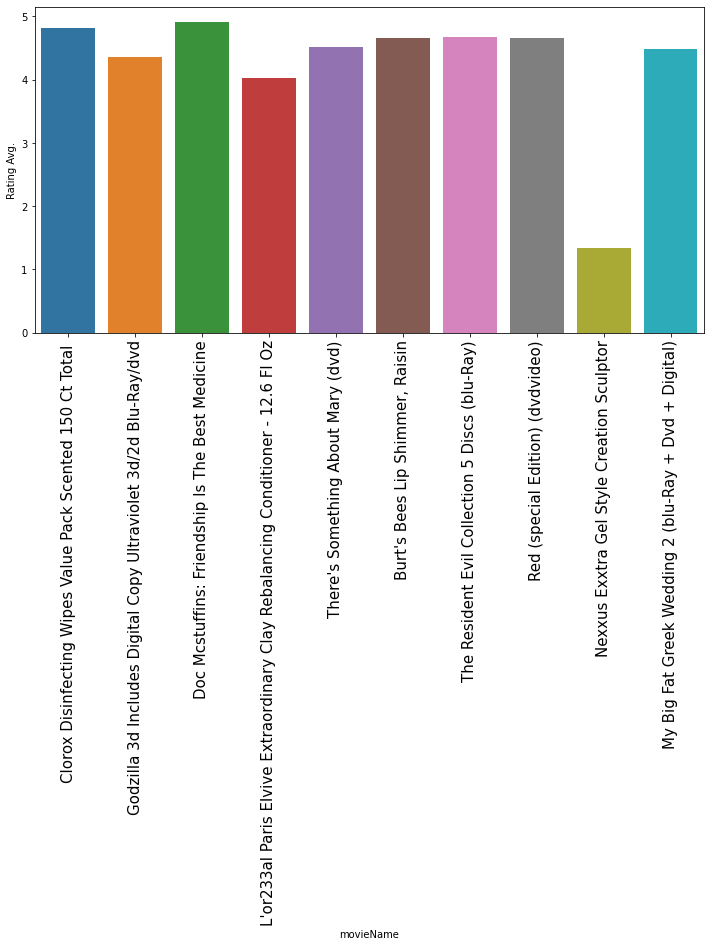

In [32]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='movieName', y="Rating Avg.",data=df_movies)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

[Text(0, 0, 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total '),
 Text(0, 0, 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd'),
 Text(0, 0, 'Doc Mcstuffins: Friendship Is The Best Medicine'),
 Text(0, 0, "L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz"),
 Text(0, 0, "There's Something About Mary (dvd)"),
 Text(0, 0, "Burt's Bees Lip Shimmer, Raisin"),
 Text(0, 0, 'The Resident Evil Collection 5 Discs (blu-Ray)'),
 Text(0, 0, 'Red (special Edition) (dvdvideo)'),
 Text(0, 0, 'Nexxus Exxtra Gel Style Creation Sculptor'),
 Text(0, 0, 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)')]

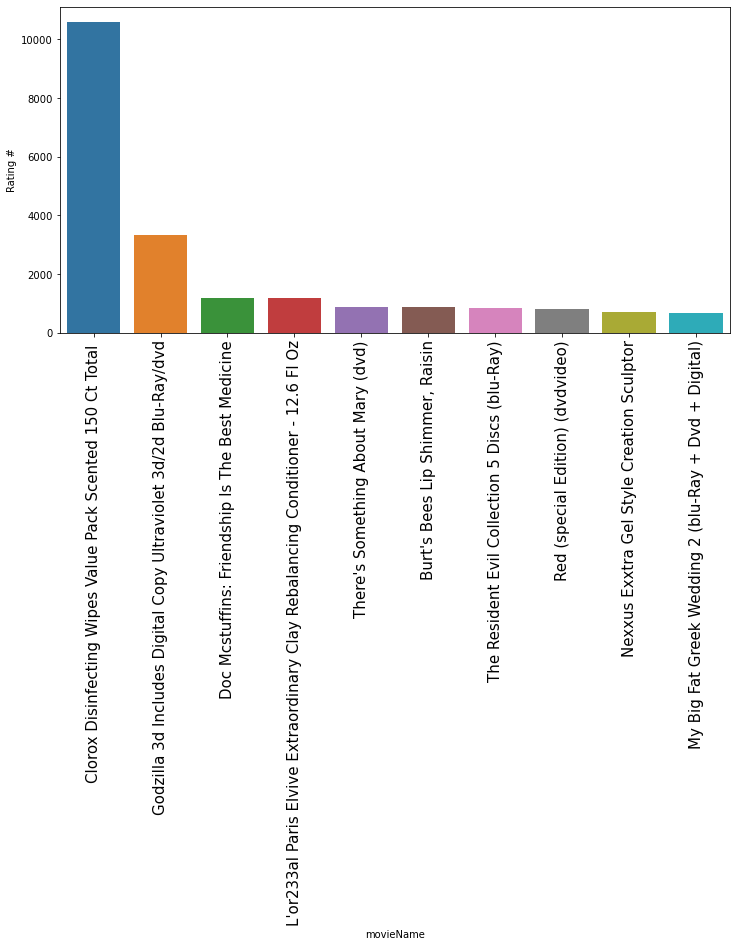

In [33]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='movieName', y="Rating #",data=df_movies)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,size=15)

# Looking at Movies According to 'title' Column (based on # of reviews)

In [34]:
df['reviews_title'].value_counts().head(10)

Great Product    384
Great movie      361
Clorox Wipes     278
Great            221
Great product    205
Good movie       195
Awesome          186
Great Movie      156
great product    140
great movie      139
Name: reviews_title, dtype: int64

When I look at the top 10 highest review numbers movies, I realized this list is different than movie ID's list. I realized that some movies have series but as title they were written as same. Also, there are different movies with same names. So, finding a title according to movie ID is more reliable way from just looking at titles.

## 2. Data Cleaning

In [35]:
df_columns = df[['reviews_title', 'reviews_text', 'user_sentiment']]
df_columns.head()

,reviews_title,reviews_text,user_sentiment
0,Just Awesome,i love this album. it's very good. more to the...,Positive
1,Good,Good flavor. This review was collected as part...,Positive
2,Good,Good flavor.,Positive
3,Disappointed,I read through the reviews on here before look...,Negative
4,Irritation,My husband bought this gel for us. The gel cau...,Negative


In [37]:
df.user_sentiment.value_counts(normalize=True)

Positive    0.887786
Negative    0.112214
Name: user_sentiment, dtype: float64

# Word Clouds

Word clouds are the easiest way of looking the most popular or characteristic words in the text. To see the difference of words between positive,negative and neutral reviews, I will build three word clouds.  

In [38]:
df.info(verbose=True, null_counts=True) #to see the # of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29809 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29809 non-null  object
 1   brand                 29809 non-null  object
 2   categories            29809 non-null  object
 3   manufacturer          29668 non-null  object
 4   name                  29809 non-null  object
 5   reviews_date          29763 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27405 non-null  object
 8   reviews_rating        29809 non-null  int64 
 9   reviews_text          29809 non-null  object
 10  reviews_title         29809 non-null  object
 11  reviews_userCity      1928 non-null   object
 12  reviews_userProvince  167 non-null    object
 13  user_sentiment        29809 non-null  object
dtypes: int64(1), object(13)
memory usage: 4.7+ MB


To classify the positive or negative reviews, I will collect 4 and 5 ratingd together as positives and encode them as 2. I will encode rating 3 as 0 and rating 1 and 2 as 1.

In [39]:
def calculate_sentiment_with_neutral(reviews_rating):
    '''encoding the sentiments of the ratings.'''
    if reviews_rating == 5 or reviews_rating == 4:
        return 2
    elif reviews_rating == 1 or reviews_rating==2 : 
        return 0
    else:
        return 1

In [40]:
df['user_sentiment'] = df['reviews_rating'].apply(calculate_sentiment_with_neutral) #applyind function

In [41]:
df.groupby(['user_sentiment','reviews_rating']).count()

id  brand  categories  manufacturer   name  \
user_sentiment reviews_rating                                                  
0              1                1372   1372        1372          1370   1372   
               2                 411    411         411           409    411   
1              3                1333   1333        1333          1316   1333   
2              4                6002   6002        6002          5947   6002   
               5               20691  20691       20691         20626  20691   

                               reviews_date  reviews_didPurchase  \
user_sentiment reviews_rating                                      
0              1                       1370                  828   
               2                        404                  183   
1              3                       1326                  446   
2              4                       5997                 2449   
               5                      20666                12026   

                               reviews_doRecommend  reviews_text  \
user_sentiment reviews_rating                                      
0              1                               886          1372   
               2                               294           411   
1              3                              1147          1333   
2              4                              5690          6002   
               5                             19388         20691   

                               reviews_title  reviews_userCity  \
user_sentiment reviews_rating                                    
0              1                        1372               190   
               2                         411                33   
1              3                        1333                77   
2              4                        6002               442   
               5                       20691              1186   

                               reviews_userProvince  
user_sentiment reviews_rating                        
0              1                                 52  
               2                                  9  
1              3                                 11  
2              4                                 36  
               5                                 59

From chart above, we can check how the overall ratings classified and encoded.

In [42]:
df['user_sentiment'].value_counts() #number of new sentiments

2    26693
0     1783
1     1333
Name: user_sentiment, dtype: int64

# Preprocessing the Reviews

For computers, 'Movies' is not same word with 'movies'. So, I will do every letter in the text lowercase. And, clean the punctuations from text to make them more accurate for my model.

In [43]:
df['reviews_text']=df['reviews_text'].str.lower() # to make all letters lower

In [44]:
df['reviews_text'] #check lower

0        i love this album. it's very good. more to the...
1        good flavor. this review was collected as part...
2                                             good flavor.
3        i read through the reviews on here before look...
4        my husband bought this gel for us. the gel cau...
                               ...                        
29995    i got this conditioner with influenster to try...
29996    i love it , i received this for review purpose...
29997    first of all i love the smell of this product....
29998    i received this through influenster and will n...
29999    i received this product complimentary from inf...
Name: reviews_text, Length: 29809, dtype: object

In [54]:
import string
string.punctuation # to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [56]:
#removing punctions
df['review_clean'] = df['reviews_text'].apply(lambda x: remove_punctuation(x))
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,user_sentiment,review_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,2,i love this album its very good more to the hi...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,good flavor. this review was collected as part...,Good,NaN,NaN,2,good flavor this review was collected as part ...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,good flavor.,Good,NaN,NaN,2,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,i read through the reviews on here before look...,Disappointed,NaN,NaN,0,i read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,my husband bought this gel for us. the gel cau...,Irritation,NaN,NaN,0,my husband bought this gel for us the gel caus...


When I look at the clean text and original text, I can check the punctuations were removed.

In [57]:
df['review_clean'][3]

'i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation we had both been expecting im disappointed that i paid as much as i did for a lube that i wont use again when i could just use their normal personal lubricant for 1 less money and 2 less mess'

In [58]:
df['reviews_text'][3]

"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, neither my boyfriend nor i could notice any sort of enhanced or 'captivating' sensation. what we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. it was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. i'm disappointed that i paid as much as i did for a lube that i won't use again, when i could just use their normal personal lubricant for 1) less money and 2) less mess."

To compare the most common words in positive, negative and neutral, I will divide dataframe as positive, negative and neutral based on sentiments.

In [59]:
df_pos = df.loc[df['user_sentiment']==2] # positive reviews dataframe

In [60]:
df_neg = df.loc[df['user_sentiment']==0] # negative reviews dataframe

In [61]:
df_notr = df.loc[df['user_sentiment']==1] # neutral reviews dataframe

In [62]:
stop_words = set(STOPWORDS) # setting stop words

In [63]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400)

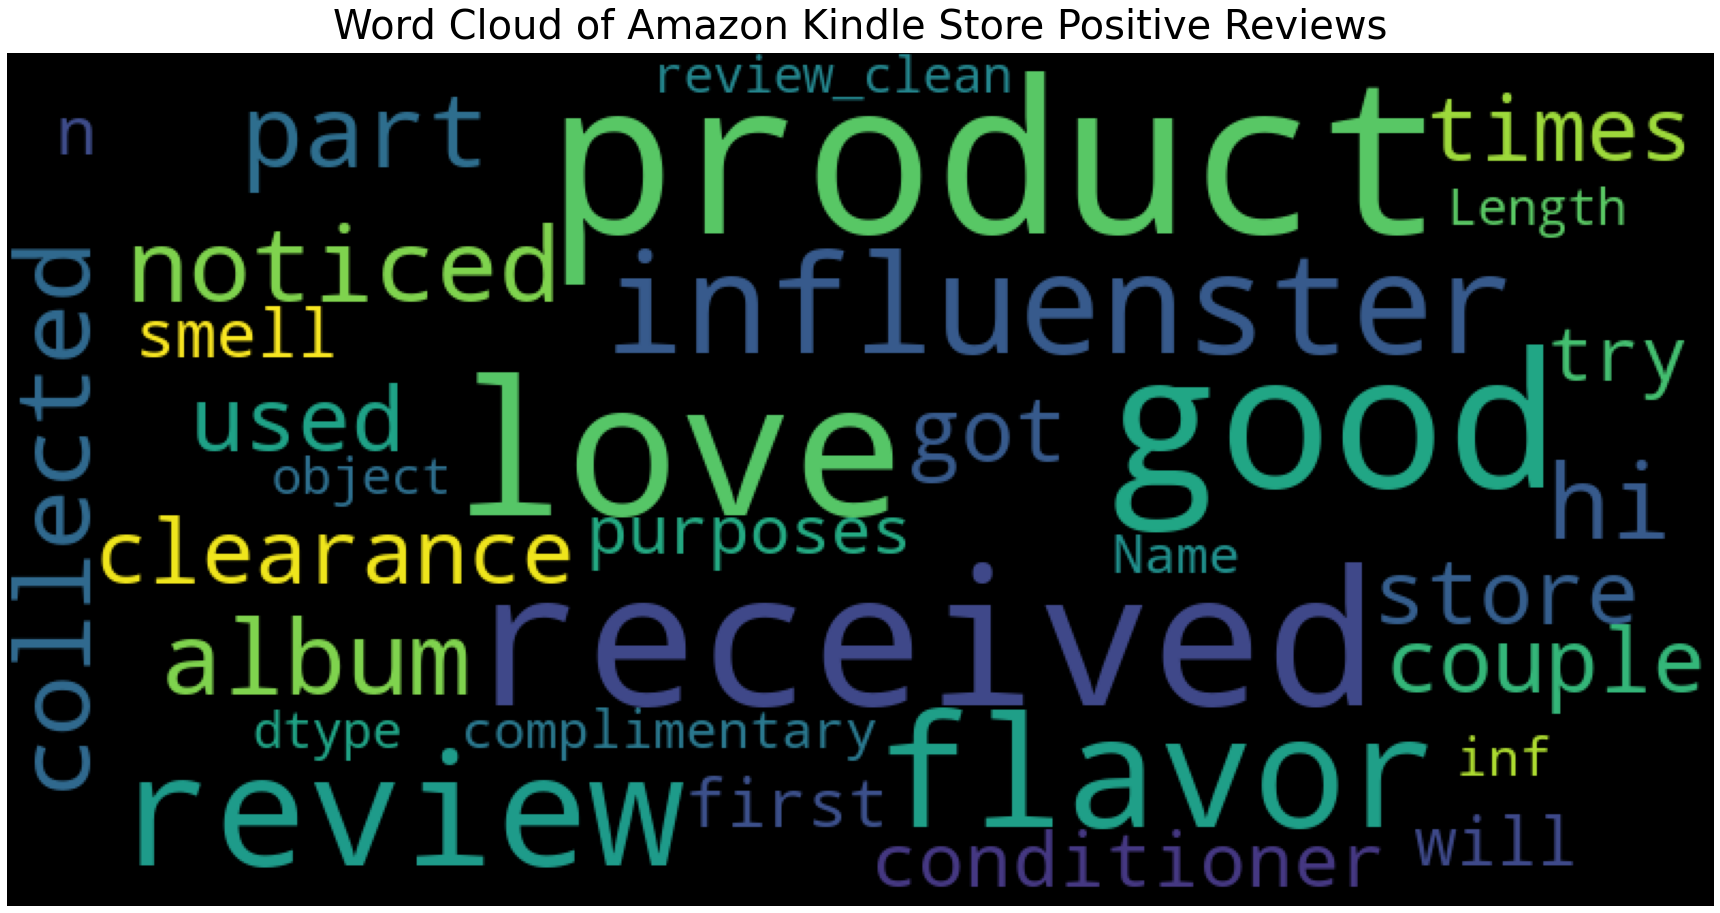

In [64]:
# to see the positive reviews wordcloud
wordcloud.generate(str(df_pos['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

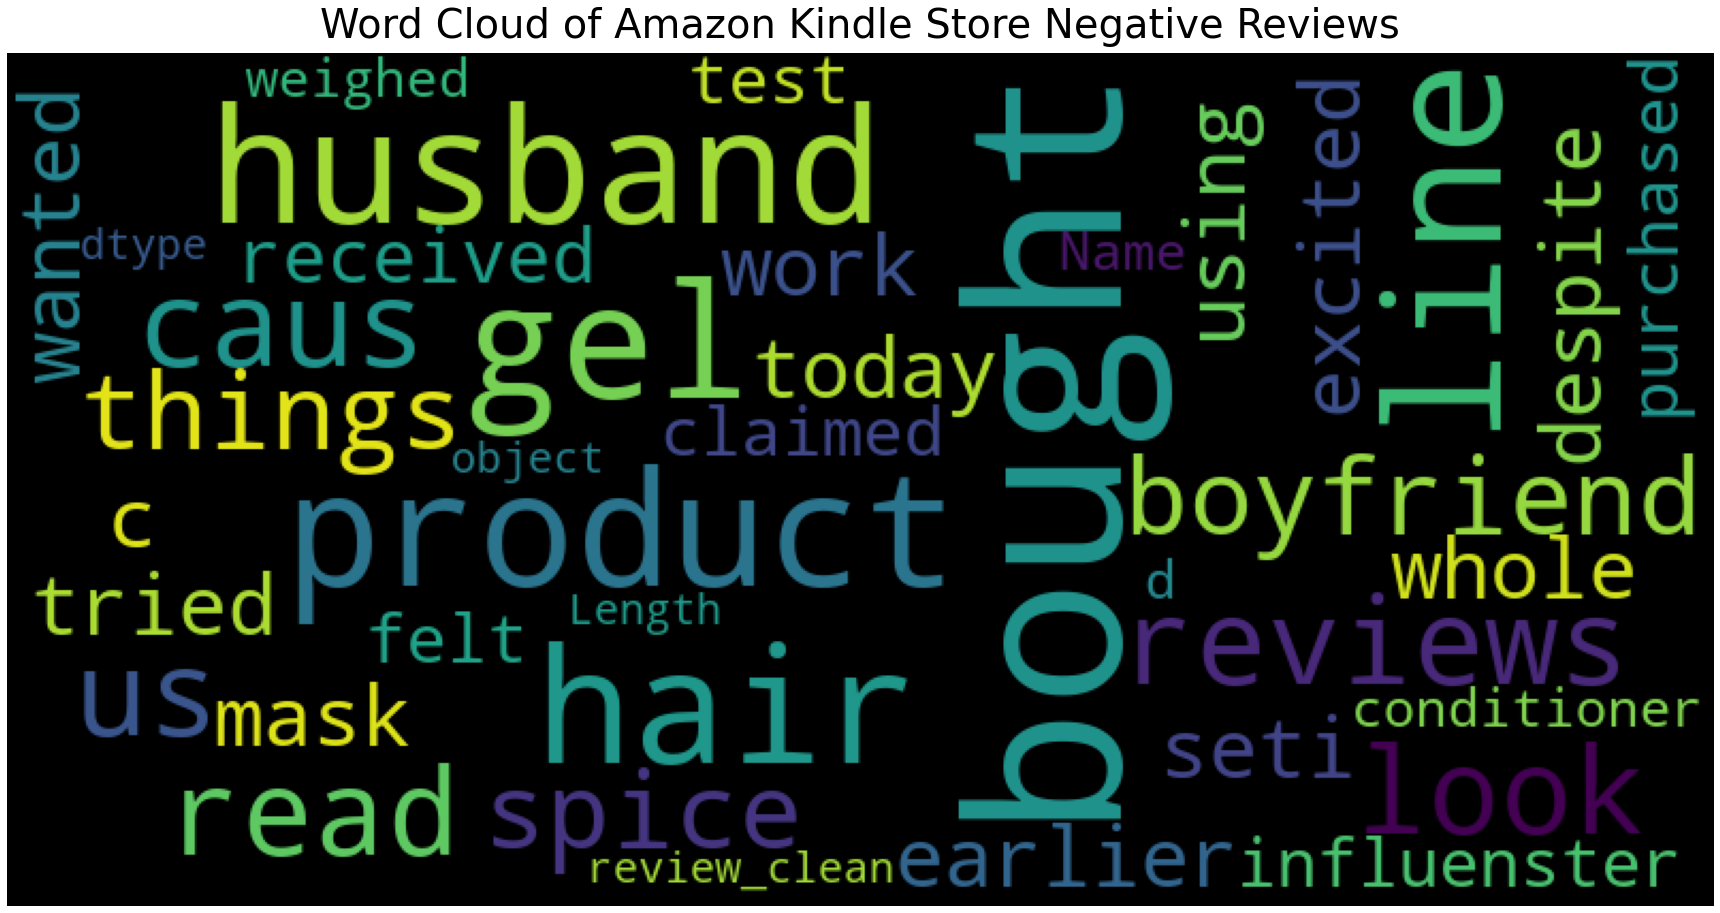

In [65]:
# to see negative wordcloud
wordcloud.generate(str(df_neg['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

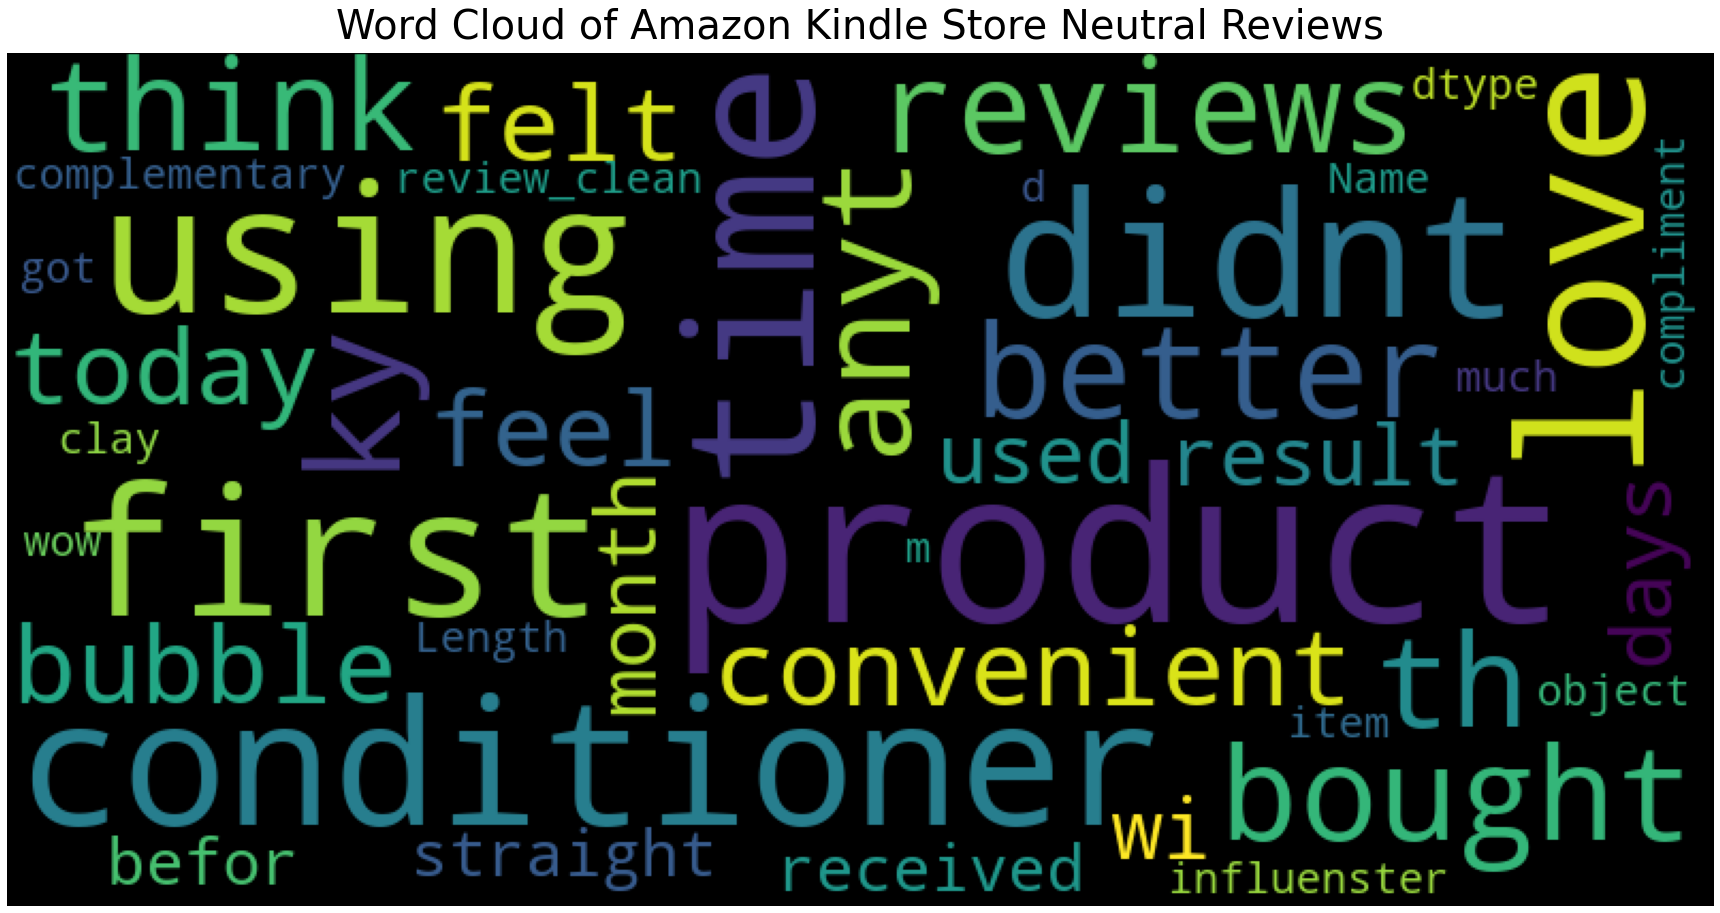

In [66]:
# to see neutral wordcloud
wordcloud.generate(str(df_notr['review_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Kindle Store Neutral Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

# Another Way to Look Most Common Positive and Negative Words

Wordclouds give general idea about what is text about but I need more characteristic words because all words are not in the same text in this data. I will try another method to look common words in positive and negative dataframes.

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swammy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num

### Top 25 Common Words List in Positive Reviews

In [69]:
word_frequency=word_count(df_pos['review_clean']) #tokenize and count and create dictionary

In [70]:
# to create dataframe from most common words dictionary

df_pos_count = pd.DataFrame(columns=['word', 'count'])
df_pos_count['word'] = word_frequency.keys()
df_pos_count['count'] = list(word_frequency.values())
df_pos_count=df_pos_count.sort_values(by=['count'], ascending=False)
df_pos_count=df_pos_count.reset_index(drop=True)

In [71]:
stop = set(stopwords.words("english")) #setting stopwords

I will create new column as word_without_stop and drop the row if it contains stopwords.

In [72]:
# taking only words which are not stopwords
df_pos_count['word_without_stop'] = df_pos_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [73]:
# dropping stop words columns
df_pos_without_stop = df_pos_count.dropna(subset=['word_without_stop'])

In [74]:
# taking top 25 words
df_top_25_pos = df_pos_count.loc[df_pos_count['word_without_stop']!=''].head(25)

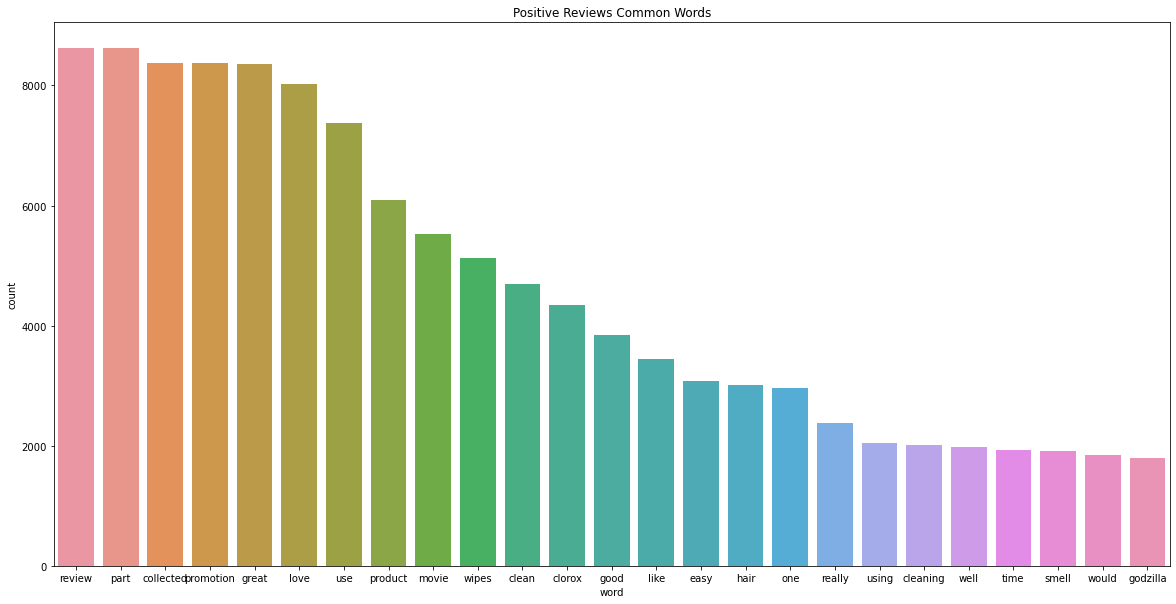

In [75]:
plt.figure(figsize=(20,10))
plt.title('Positive Reviews Common Words')
sns.barplot("word","count", data=df_top_25_pos)

# Top 25 Common Words List in Negative Reviews

I will do same steps with positive words for negative words.

In [76]:
word_frequency_neg=word_count(df_neg['review_clean'])

In [77]:
df_neg_count = pd.DataFrame(columns=['word', 'count'])
df_neg_count['word'] = word_frequency_neg.keys()
df_neg_count['count'] = list(word_frequency_neg.values())
df_neg_count=df_neg_count.sort_values(by=['count'], ascending=False)
df_neg_count=df_neg_count.reset_index(drop=True)


In [78]:
df_neg_count['word_without_stop'] = df_neg_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [79]:
df_neg_without_stop = df_neg_count.dropna(subset=['word_without_stop'])

In [80]:
df_top_25_neg = df_neg_count.loc[df_neg_count['word_without_stop']!=''].head(25)

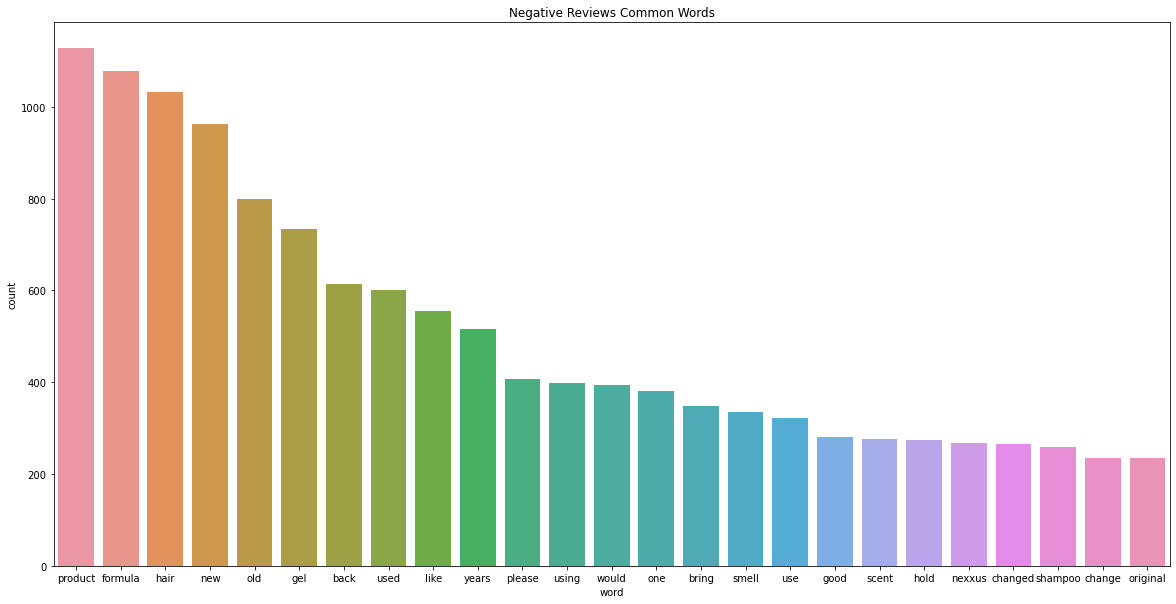

In [81]:
plt.figure(figsize=(20,10))
plt.title('Negative Reviews Common Words')
sns.barplot("word","count", data=df_top_25_neg)

# Top 25 Common Words List in Neutral Reviews

I will do same step with negative and positive for neutral.

In [82]:
word_frequency_notr = word_count(df_notr['review_clean'])

In [83]:
df_nt_count = pd.DataFrame(columns=['word', 'count'])
df_nt_count['word'] = word_frequency_notr.keys()
df_nt_count['count'] = list(word_frequency_notr.values())
df_nt_count=df_nt_count.sort_values(by=['count'], ascending=False)
df_nt_count=df_nt_count.reset_index(drop=True)

In [84]:
df_nt_count['word_without_stop'] = df_nt_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [85]:
df_nt_without_stop = df_nt_count.dropna(subset=['word_without_stop'])

In [86]:
df_top_25_nt = df_nt_count.loc[df_nt_count['word_without_stop']!=''].head(25)

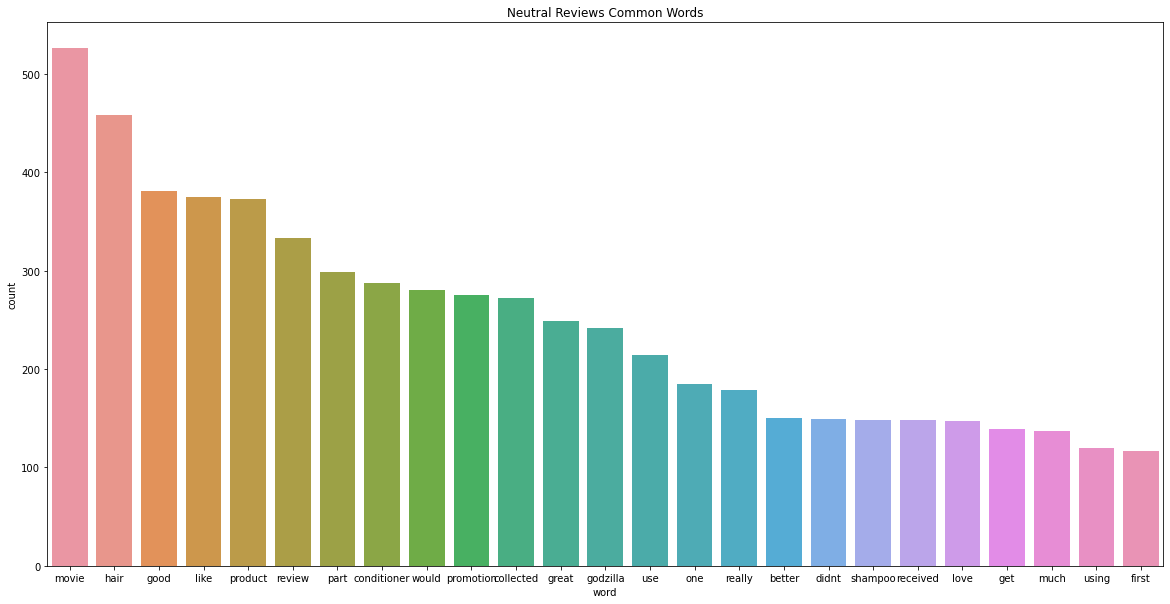

In [87]:
plt.figure(figsize=(20,10))
plt.title('Neutral Reviews Common Words')
sns.barplot("word","count", data=df_top_25_nt)

'movie' and 'product' are most common words in 3 dataframe. 'hair' is 3rd rank for positive and neutral, but for negative 'like' is in the 3rd rank. Most probably, the reason is that computer counts every word and removes stop words such as 'did not'. If the most common words are 'did not like' for negative, it is counted as 'like'. To handle this problem, I will use bi-grams for modeling which takes the words as couple.

# Simple LogReg 

My aim in this project to use machine learning and deep learning techniques for classifing the text. But, to look at the 3-class target simple model, I will use simple LogReg. 

## Taking Sample and Train-Test Split

My data has more than 2 million rows and it is hard to run each time to find the best model. First problem is my computer's CPU most probably not enough for this. And, second problem is that it takes too much time to run for each model. So, I will use one of the most common techniques in big data and I will take samples from each label class. I will take my sample data balanced from each class, because I want that my model learns more information from also minority class.

In [88]:
df['user_sentiment'].value_counts()

2    26693
0     1783
1     1333
Name: user_sentiment, dtype: int64

### Taking 50000 Samples from Each Class

In [89]:
df_0 = df.loc[df['user_sentiment']==0].head(50000)

In [90]:
df_1 = df.loc[df['user_sentiment']==1].head(50000)

In [91]:
df_2 = df.loc[df['user_sentiment']==2].head(50000)

In [92]:
frames = [df_0, df_1, df_2]
#getting together samples
df_sampled = pd.concat(frames)

In [93]:
df_sampled['user_sentiment'].value_counts() #sample classes - balanced chosen

2    26693
0     1783
1     1333
Name: user_sentiment, dtype: int64

In [96]:
from sklearn.metrics import plot_confusion_matrix

In [104]:
def model(df) :
    '''This function splits data to train and test, then vectorized reviews 
        and calculating results from LogReg
    '''
    
    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                        df['user_sentiment'], test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
        
    # define vectorize and fit to data     
    word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

    word_vectorizer.fit(df['review_clean'])
    
    # train - test vectorized features
    train_word_features = word_vectorizer.transform(X_train)
    test_word_features = word_vectorizer.transform(X_test)
     
    # choosing and fitting classifier
    classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
    classifier.fit(train_word_features, y_train)
    
    # calculating results 
    y_pred_train = classifier.predict(train_word_features)
    y_pred = classifier.predict(test_word_features)
          
    print("Accuracy:"); print("="*len("Accuracy:"))
    print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {accuracy_score(y_test, y_pred)}")

    print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
    print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
    print(f"TEST: {balanced_accuracy_score(y_test, y_pred)}")
    

In [105]:
model(df_sampled)

(23847,)
(5962,)
Accuracy:
TRAIN: 0.8628338994422778
TEST: 0.8245555182824555

Balanced Accuracy:
TRAIN: 0.9115426148034412
TEST: 0.7254051291430823


C:\Users\swammy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


My model is overfit and there is no high accuracy which I want. I can tune this model to handle this but my aim in this project is to determine negative reviews mostly and for doing this I will try also deep learning models. I did LogReg just for first idea. So, I drop this here and continue with binary class machine learning and deep learning models which can be found in this [repo](https://github.com/ezgigm/sentiment_analysis_and_product_recommendation/tree/master/notebooks).

In [107]:
df.to_csv('sample30.csv', index = False) # to keep merged,preprocessed and cleaned version

# Findings and Explorations

## Cleaning Process

- The data has lots of null values for some features, and some unnecessary columns for modeling. Our main column is 'reviewText' column so I dropped the nulls for this column.
- Unnecessary columns were dropped such as image, vote etc.
- Upper case letters were changed to lower case in reviews and punctuations were cleaned. 
- The rows which style's are different than Kindle edition were deleted.

## Explorations & Findings

- There are more than 2 million reviews with their ratings in my data.
- Data consists of 139815 user and 98824 books mainly. 
- 64% of reviews were not verified by Amazon, but fake review detection is not the topic of this project so I assumed that all of the reviews will be approved by Amazon. 
- My target is highly imbalanced with 4 and 5 ratings are significantly higher than others.
- Although data was obtained from 1997 to 2018, most of the data points belongs to recent years especially aftert 2012. High percentage of data belongs to 2014, 2015 and 2016.
- Data contains balanced points for each day and month. Distribution of the labels also looks similar for each month.
- Top users according to review numbers generally rated books more than 3.
- Although, some books has 5 rating average, their review numbers are less so instead of looking rating average, I preferred to look highly reviewed book. 
- Top reviewed book is Fifty Shades of Grey with 2217 reviews and 4.34 rating average in my data. 
- The most common words in 4 and 5 rated books are 'book, story, read, love, one, series, characters, great'.
- The most common words in 1 and 2 rated books are 'book, story, like, read, one, would, really, author'.
- The most common words in 3 rated books are 'book, story, read, like, one, good, really, would'.
- Mostly common words are same in each rated segments, but ranks are different. Some negative words such as didnt and dont are in the most common words in negative reviews dataframe different than positive reviews dataframe. 
- 'could' and 'would' also have higher ranks in negative reviews than positive reviews. The reason can be that they could be commonly in reviews with 'not'.

## Feature Engineering

- Bi-grams and Tri-grams will be added to our model in next notebook. 